<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Bagging/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [61]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_csv('/content/Iris (1).csv')

In [85]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df = df.iloc[:, 1:]

In [87]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
encoder = LabelEncoder()

In [90]:
df['Species'] = encoder.fit_transform(df['Species'])

In [91]:
df = df[df['Species'] != 0][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [92]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

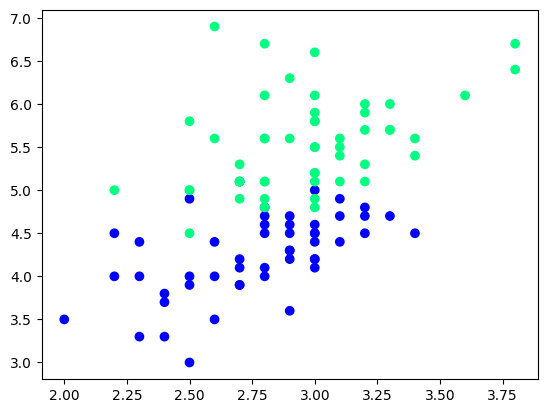

In [94]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')

In [95]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10) #builds the training set with 10 random rows from the first 60 rows
df_validation = df.iloc[60:80, :].sample(5) #picks 5 random rows from these 20 rows
df_test = df.iloc[80:, :].sample(5) #5 random rows from 20 remaining rows

In [96]:
df_train

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
62,2.2,4.0,1
143,3.2,5.9,2
55,2.8,4.5,1
149,3.0,5.1,2
51,3.2,4.5,1
114,2.8,5.1,2
105,3.0,6.6,2
122,2.8,6.7,2
129,3.0,5.8,2


In [109]:
x_test = df_validation[['SepalWidthCm', 'PetalLengthCm']].values
y_test = df_validation.iloc[:, -1].values

In [110]:
x_test

array([[2.7, 5.1],
       [2.4, 3.3],
       [3. , 4.4],
       [3.1, 4.4],
       [3.8, 6.7]])

Case 1 - Bagging

In [127]:
# data for tree
df_bag = df_train.sample(8, replace=True)

X = df_bag[['SepalWidthCm', 'PetalLengthCm']]
Y = df_bag.iloc[:, -1]

In [128]:
X

,SepalWidthCm,PetalLengthCm
122,2.8,6.7
55,2.8,4.5
62,2.2,4.0
62,2.2,4.0
122,2.8,6.7
96,2.9,4.2
55,2.8,4.5
62,2.2,4.0


In [129]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
55,2.8,4.5,1
62,2.2,4.0,1
62,2.2,4.0,1
122,2.8,6.7,2
96,2.9,4.2,1
55,2.8,4.5,1
62,2.2,4.0,1


In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [131]:
dt_bag1 = DecisionTreeClassifier()

In [134]:
def evaluate(clf, X, Y):
  clf.fit(X, Y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values, Y.values, clf=clf, legend=2)
  y_pred = clf.predict(x_test)
  print("Accuracy Score : ", accuracy_score(y_test, y_pred))

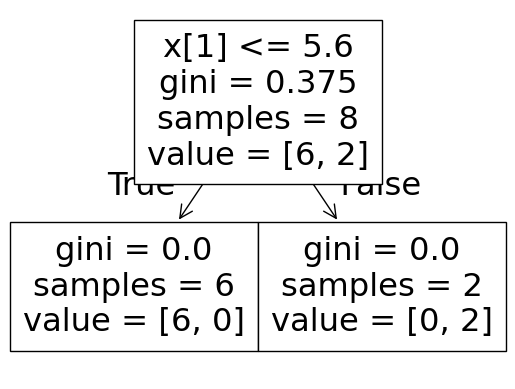

Accuracy Score :  0.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


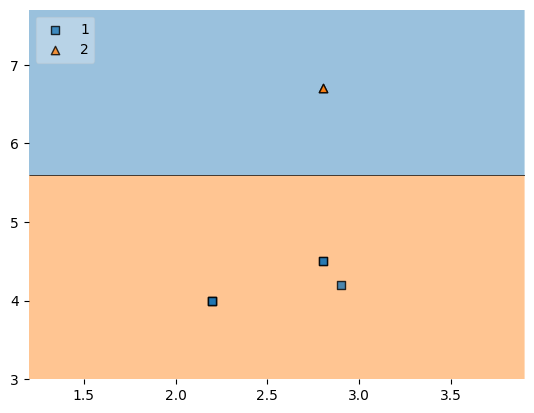

In [135]:
evaluate(dt_bag1, X, Y)

In [138]:
df_bag = df_train.sample(8, replace=True)

# fetch X and y
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]



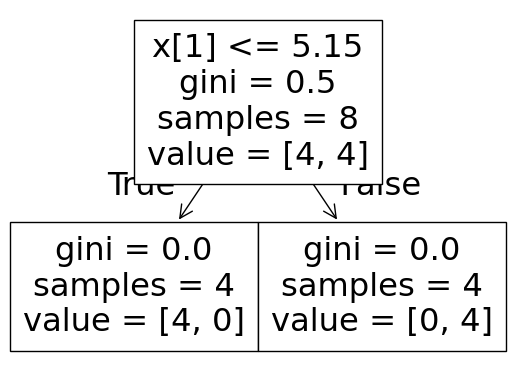

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score :  0.8


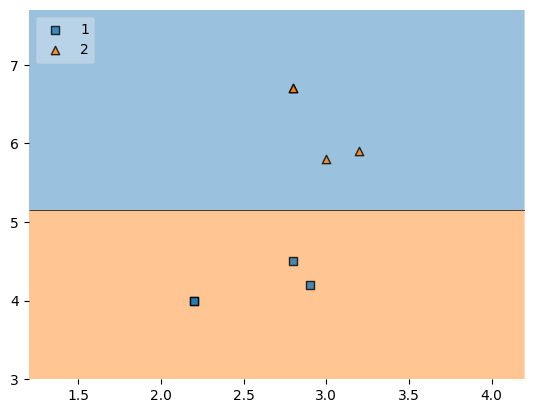

In [139]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [140]:
df_bag = df_train.sample(8, replace=True)

# fetch X and y
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

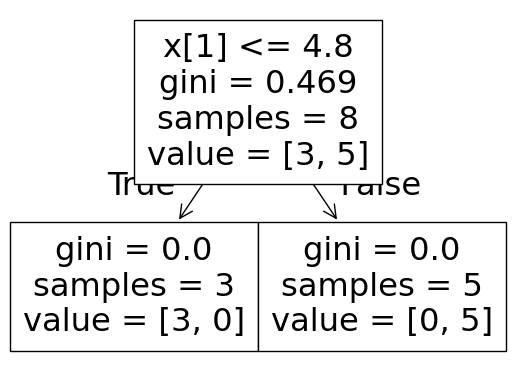

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score :  1.0


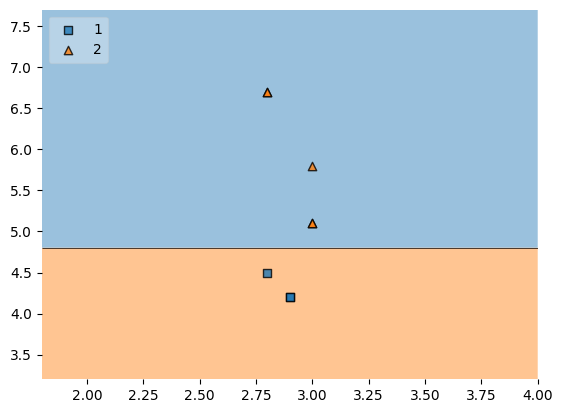

In [141]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

Predict

In [142]:
df_test

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
71,2.8,4.0,1
63,2.9,4.7,1
58,2.9,4.6,1
66,3.0,4.5,1


In [148]:
print("Predictor 1", dt_bag1.predict(np.array([3.0, 4.5]).reshape(1, 2)))
print("Predictor 2", dt_bag2.predict(np.array([3.0, 4.5]).reshape(1, 2)))
print("Predictor 3", dt_bag3.predict(np.array([3.0, 4.5]).reshape(1, 2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
